# Brazil Housing Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
bh_df = pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
bh_df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [3]:
bh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [4]:
bh_df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [5]:
bh_df.shape

(10692, 13)

In [6]:
bh_df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [7]:
bh_df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [8]:
#Figure Suitable city for relocation - Bachelors, Midsized_Family, Large_Family

In [9]:
def sep_dtypes(df):
    category = []
    continuous = []
    for col in df:
        if df[col].nunique()<40:
            category.append(col)
        else:
            continuous.append(col)
    return category, continuous

cat, con = sep_dtypes(bh_df)

table = [cat, con]
print(tabulate({"categorical": cat, "continuous": con}, headers=["category", "continuous"]))

category        continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [10]:
bh_df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973


In [11]:
def cat_info(col):
    print(f'Unique values in {col} :{bh_df[col].nunique()}')
    print(f'Missing values count for {col} : {bh_df[col].isnull().sum()}')
    print(f'Mode of {col} : {bh_df[col].mode()[0]}')
    value_count=bh_df[col].value_counts()
    print("Value counts")
    print(value_count)
    value_per=bh_df[col].value_counts(normalize=True)*100
    print('Value Percentage')
    print(value_per)
    
def visual(col):
    value_count=bh_df[col].value_counts()
    value_per=bh_df[col].value_counts(normalize=True)*100
    if bh_df[col].nunique()<5:
        plt.figure(figsize=(5,5))
    else:
        plt.figure(figsize=(5,5))
    plt.bar(value_count.index,value_count.values)
    plt.title(f'Value count of {col}')
    
    plt.figure(figsize=(7,7))
    plt.pie(value_per.values,labels=value_count.index,autopct='%1.1f%%')
    plt.title(f'Percentage of {col}')
def main(col):   
    cat_info(col)
    visual(col)

Unique values in city :5
Missing values count for city : 0
Mode of city : São Paulo
Value counts
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64
Value Percentage
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64


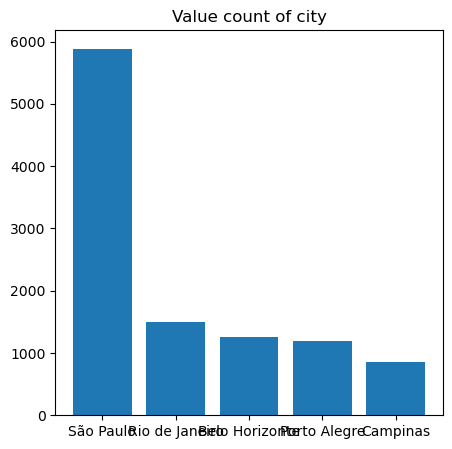

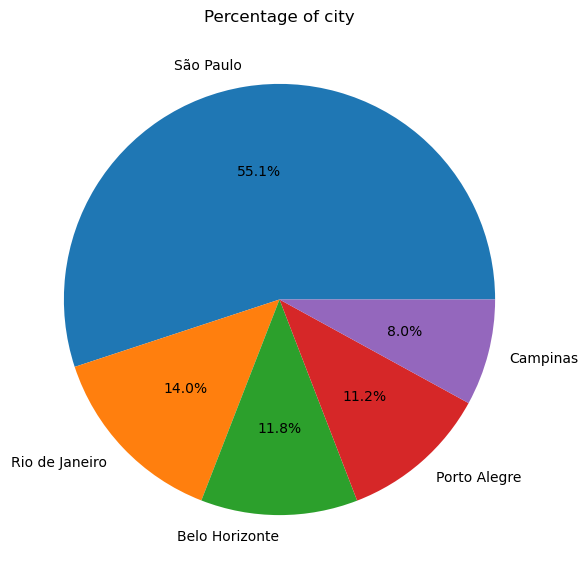

In [12]:
main('city')

### Sao Paulo has the highest house value.

Unique values in rooms :11
Missing values count for rooms : 0
Mode of rooms : 3
Value counts
3     3269
2     2975
1     2454
4     1586
5      288
6       68
7       36
8       11
10       3
13       1
9        1
Name: rooms, dtype: int64
Value Percentage
3     30.574261
2     27.824542
1     22.951740
4     14.833520
5      2.693603
6      0.635990
7      0.336700
8      0.102881
10     0.028058
13     0.009353
9      0.009353
Name: rooms, dtype: float64


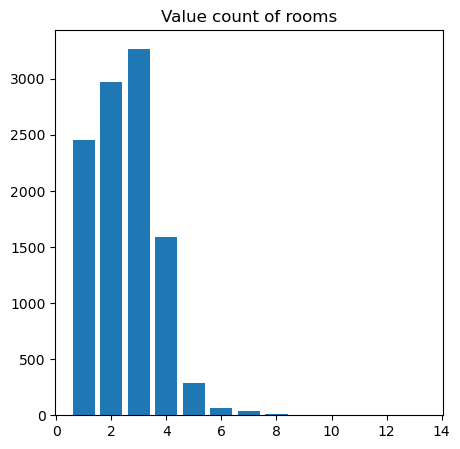

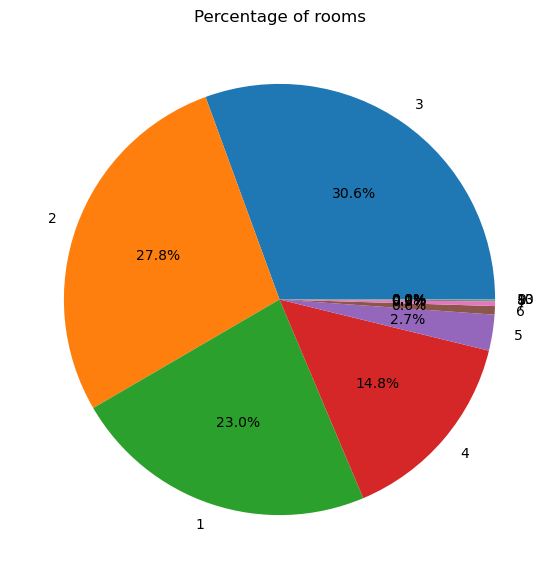

In [13]:
main('rooms')

### The House with 3 Rooms are highest.

Unique values in bathroom :10
Missing values count for bathroom : 0
Mode of bathroom : 1
Value counts
1     4301
2     2910
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: bathroom, dtype: int64
Value Percentage
1     40.226337
2     27.216611
3     13.786008
4     10.390947
5      5.405911
6      2.010849
7      0.794987
8      0.102881
9      0.037411
10     0.028058
Name: bathroom, dtype: float64


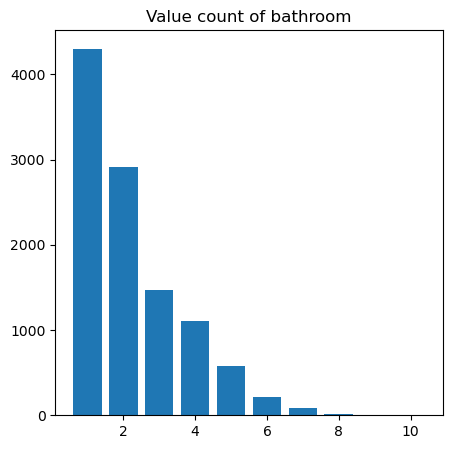

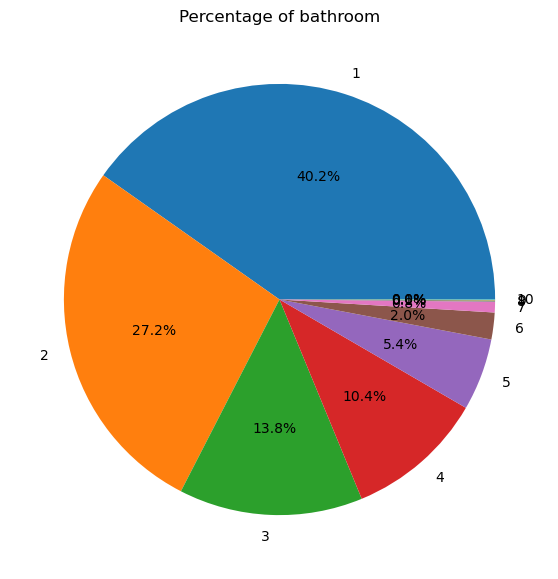

In [14]:
main('bathroom')

### The House having 1 bathroom space is highest followed by 2 bathrooms with less percentage.

Unique values in parking spaces :11
Missing values count for parking spaces : 0
Mode of parking spaces : 1
Value counts
1     3630
0     2683
2     2070
3      968
4      789
5      230
6      163
8      123
7       33
10       2
12       1
Name: parking spaces, dtype: int64
Value Percentage
1     33.950617
0     25.093528
2     19.360269
3      9.053498
4      7.379349
5      2.151141
6      1.524504
8      1.150393
7      0.308642
10     0.018706
12     0.009353
Name: parking spaces, dtype: float64


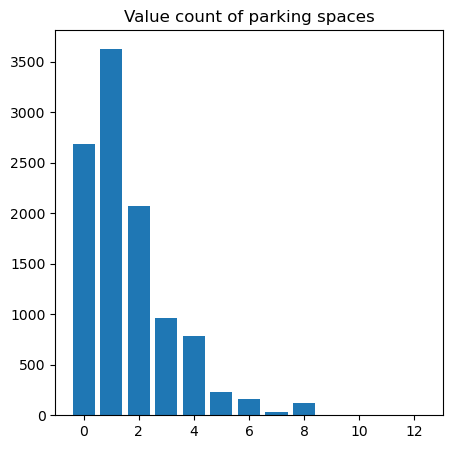

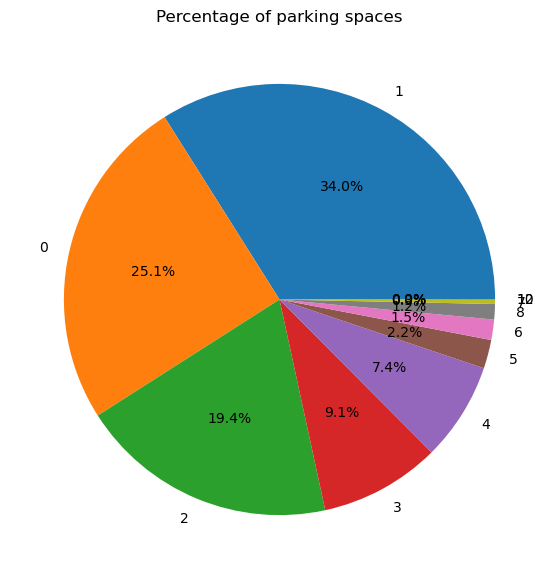

In [15]:
main('parking spaces')

### The House having one single parking space are more in number. 

Unique values in floor :35
Missing values count for floor : 0
Mode of floor : 0
Value counts
0      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64
Value Percentage
0      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24

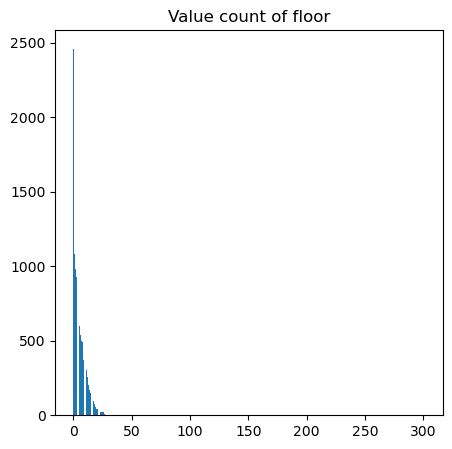

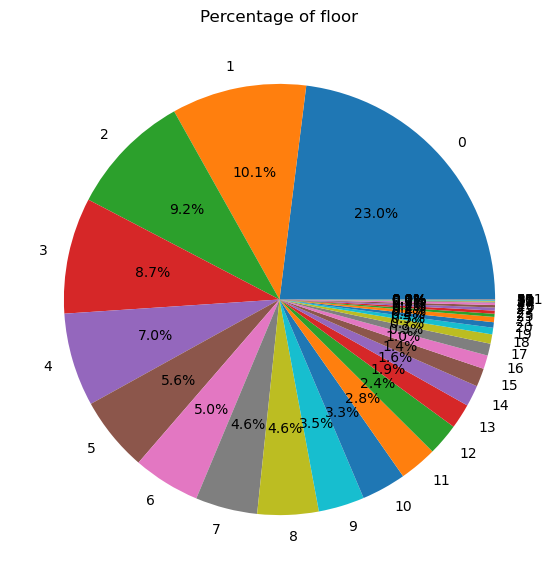

In [16]:
main('floor')

### The most Houses are ground level

Unique values in animal :2
Missing values count for animal : 0
Mode of animal : acept
Value counts
acept        8316
not acept    2376
Name: animal, dtype: int64
Value Percentage
acept        77.777778
not acept    22.222222
Name: animal, dtype: float64


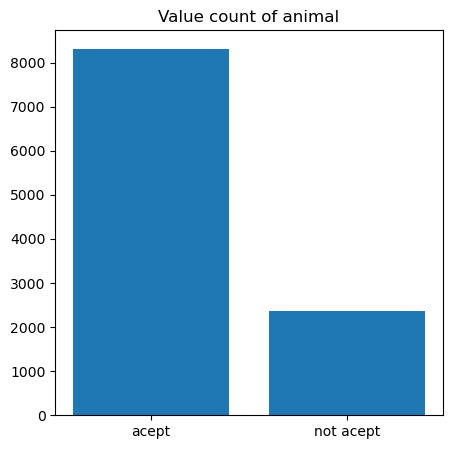

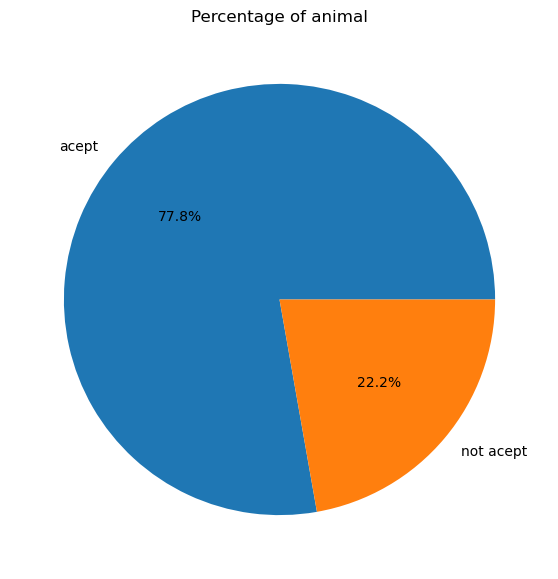

In [17]:
main('animal')

### Most of the Houses Animals are welcomed. 

Unique values in furniture :2
Missing values count for furniture : 0
Mode of furniture : not furnished
Value counts
not furnished    8086
furnished        2606
Name: furniture, dtype: int64
Value Percentage
not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64


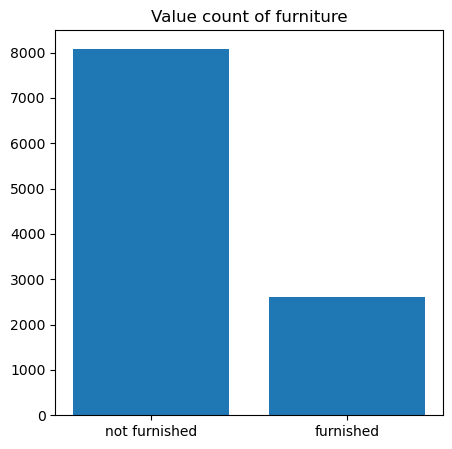

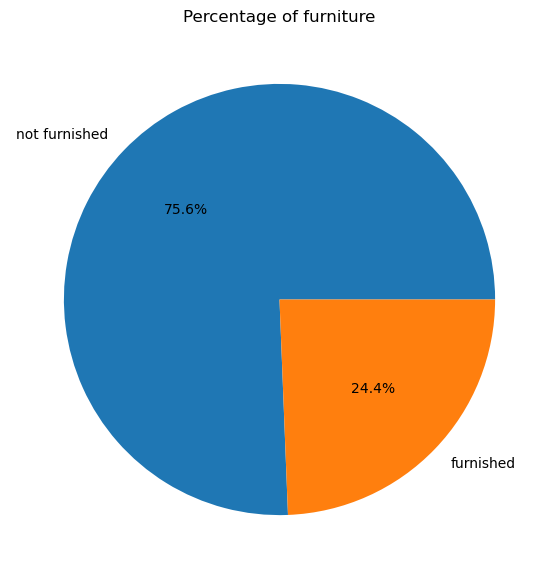

In [18]:
main('furniture')

### Most of the Houses are not Furnished.

In [19]:
def num_info(col):
    print(col)
    summary=bh_df[col].describe()
    print(summary)
    print(f'median {bh_df[col].median()}')
    print(f'mode {bh_df[col].mode()[0]}')
    print(f'skewness {bh_df[col].skew()}')
    print(f'kurtos {bh_df[col].kurt()}')
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    ax[0].hist(bh_df[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=bh_df[col],ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('count')
def main(col):
    num_info(col)
    num_visual(col)
    
def outliers(col):
    summary=bh_df[col].describe()
    iqr=(summary['75%']-summary['25%'])
    up_l=summary['75%']+1.5*iqr
    low_l=summary['25%']-1.5*iqr
    bh_df.loc[bh_df[col]>up_l,col]=bh_df[col].median()

area
count    10692.000000
mean       114.426581
std         80.495693
min         11.000000
25%         56.000000
50%         90.000000
75%        150.000000
max        370.000000
Name: area, dtype: float64
median 90.0
mode 90
skewness 1.2562484488460723
kurtos 0.7830873659373467


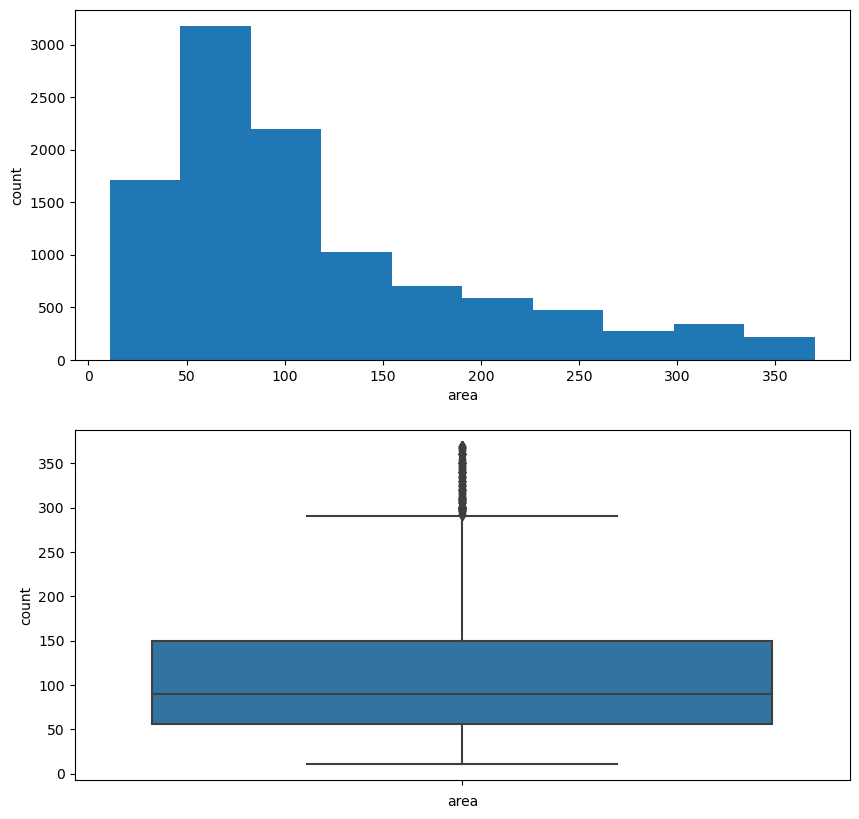

In [20]:
outliers('area')
main('area')

### 50% of the data lies below 90 hec and 75% of area is under 56 to 150 hec

hoa (R$)
count    10692.000000
mean       684.176487
std        668.443093
min          0.000000
25%        170.000000
50%        560.000000
75%        978.000000
max       2835.000000
Name: hoa (R$), dtype: float64
median 560.0
mode 0
skewness 1.1820840981810898
kurtos 0.790877084640198


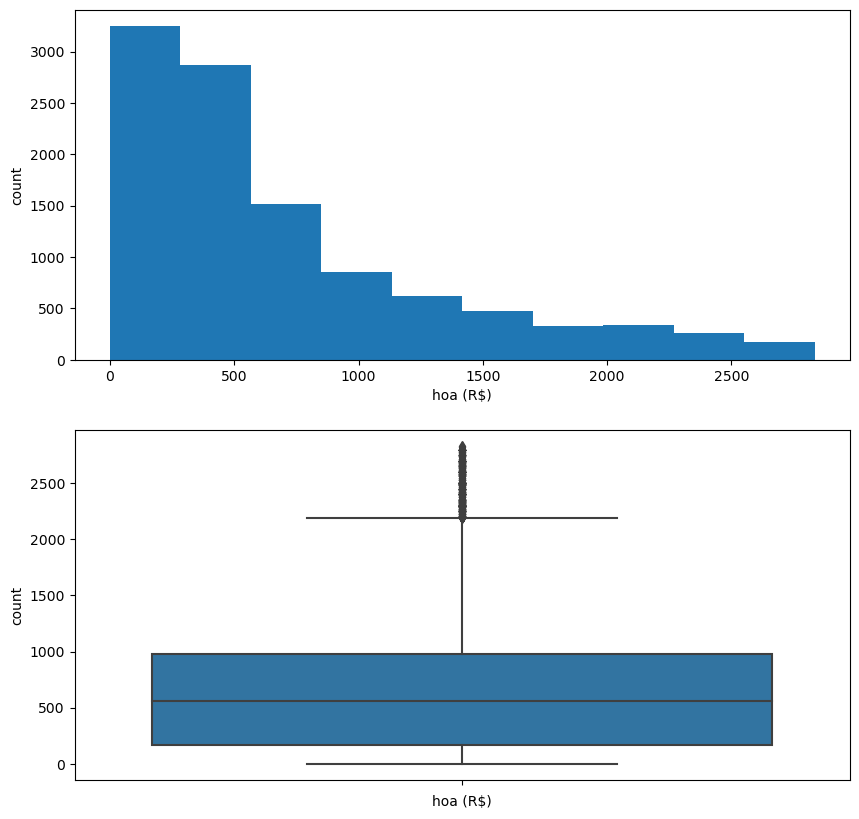

In [21]:
outliers('hoa (R$)')
main('hoa (R$)')

### 75% of hao is between 170 to 978 R$

rent amount (R$)
count    10692.000000
mean      3183.769173
std       2222.330487
min        450.000000
25%       1530.000000
50%       2660.500000
75%       4000.000000
max      10200.000000
Name: rent amount (R$), dtype: float64
median 2660.5
mode 2661
skewness 1.3069307486179944
kurtos 1.0616778980833046


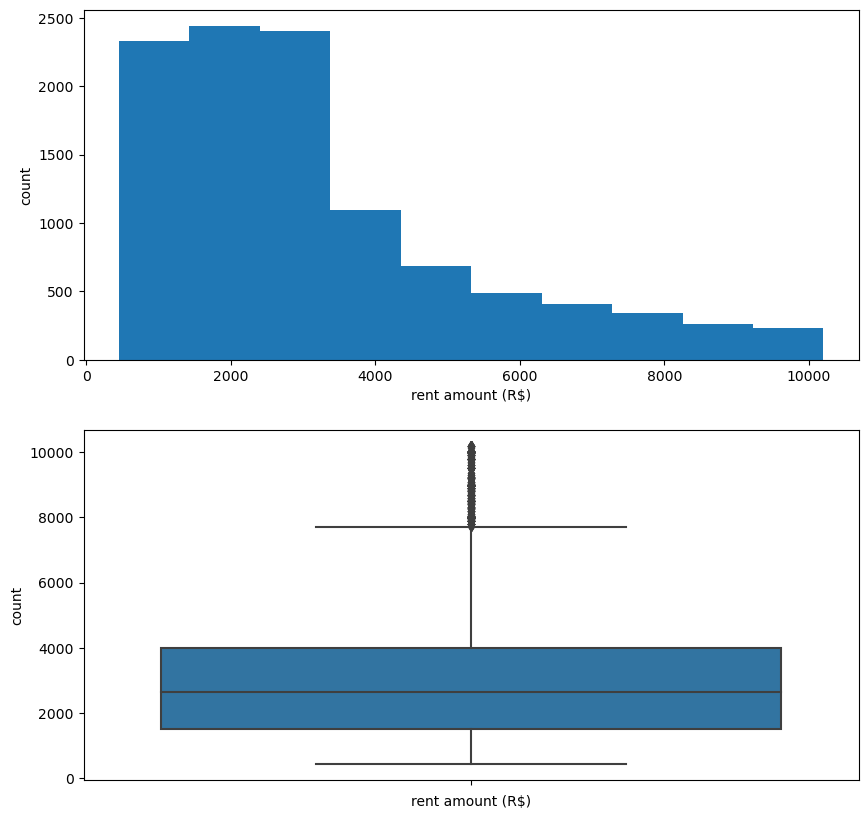

In [22]:
outliers('rent amount (R$)')
main('rent amount (R$)')

### 75% of rent is between 1530 to 4000 R$

property tax (R$)
count    10692.000000
mean       175.791339
std        196.264070
min          0.000000
25%         38.000000
50%        125.000000
75%        239.000000
max        880.000000
Name: property tax (R$), dtype: float64
median 125.0
mode 0
skewness 1.6093219785672295
kurtos 2.058886251851202


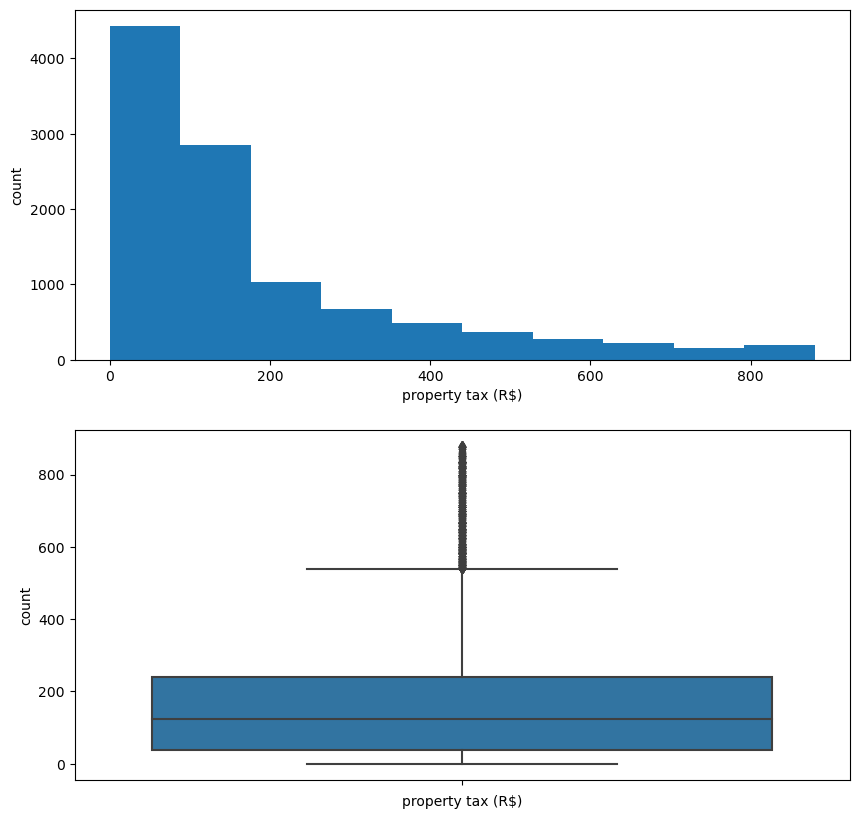

In [23]:
outliers('property tax (R$)')
main('property tax (R$)')

### 75% of property tax is between 38 to 239 R$

fire insurance (R$)
count    10692.000000
mean        42.351945
std         29.236182
min          3.000000
25%         21.000000
50%         36.000000
75%         54.000000
max        138.000000
Name: fire insurance (R$), dtype: float64
median 36.0
mode 36
skewness 1.3142172264585248
kurtos 1.1027158714593912


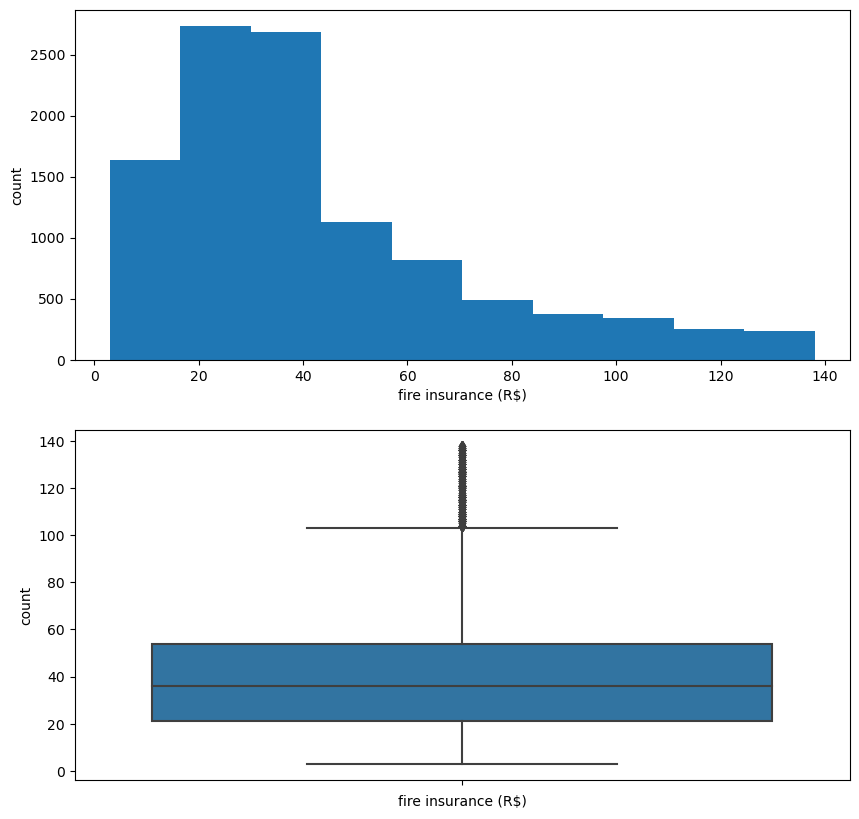

In [24]:
outliers('fire insurance (R$)')
main('fire insurance (R$)')

### 75% of hao is betwwen 21 to 54R$

total (R$)
count    10692.000000
mean      4289.976244
std       2980.824957
min        499.000000
25%       2061.750000
50%       3581.250000
75%       5536.000000
max      13820.000000
Name: total (R$), dtype: float64
median 3581.25
mode 3581.5
skewness 1.2401114289206254
kurtos 0.8271908554895004


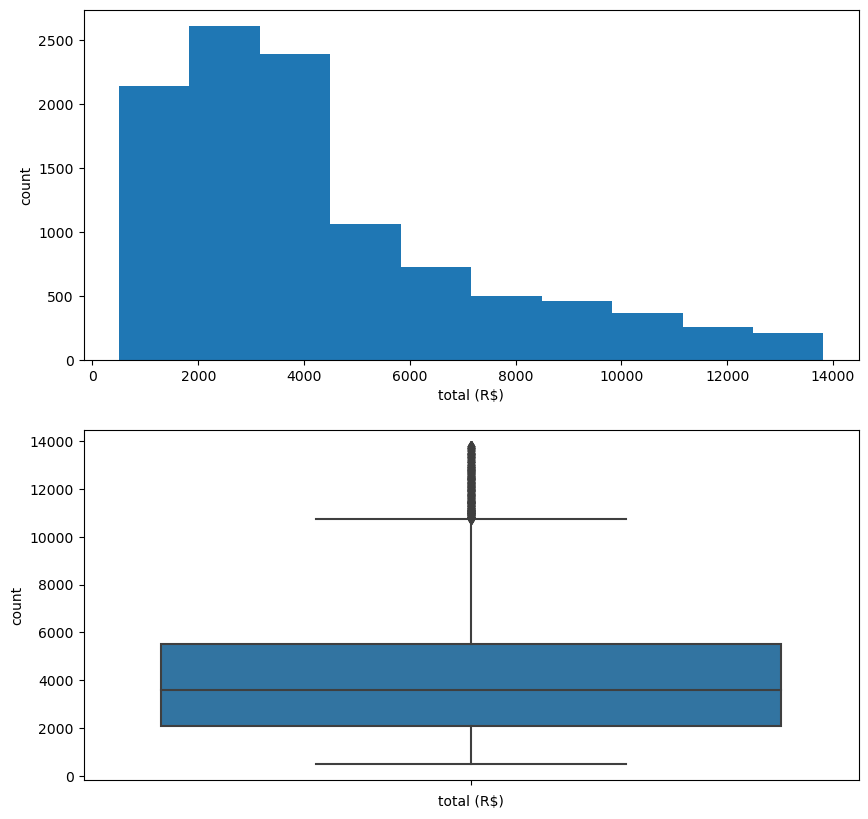

In [25]:
outliers('total (R$)')
main('total (R$)')

### 75% of total is between 2061 to 5536 r$

## BiVariate Analysis

In [26]:
def bivar(col, col1='city'):
    fig,ax=plt.subplots(figsize=(20,5))
    sns.countplot(hue=col,x='city',data=bh_df)
    plt.xlabel(col)
    plt.ylabel('count')

In [27]:
cat

['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']

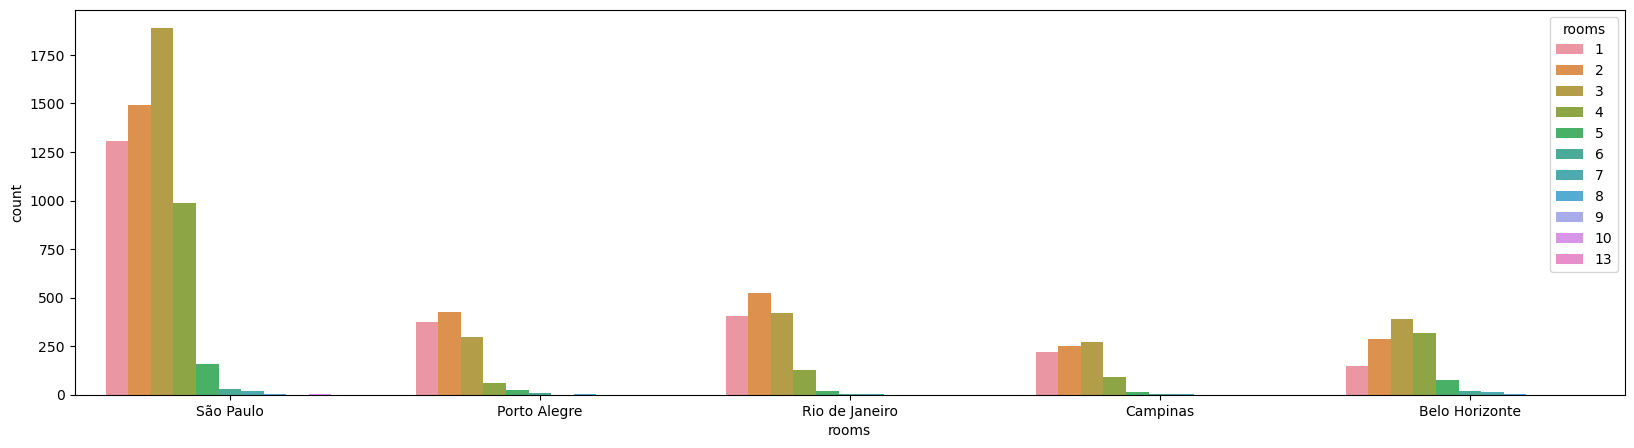

In [28]:
bivar('rooms')

### 3 Bedroom Houses are more in Sao Paulo

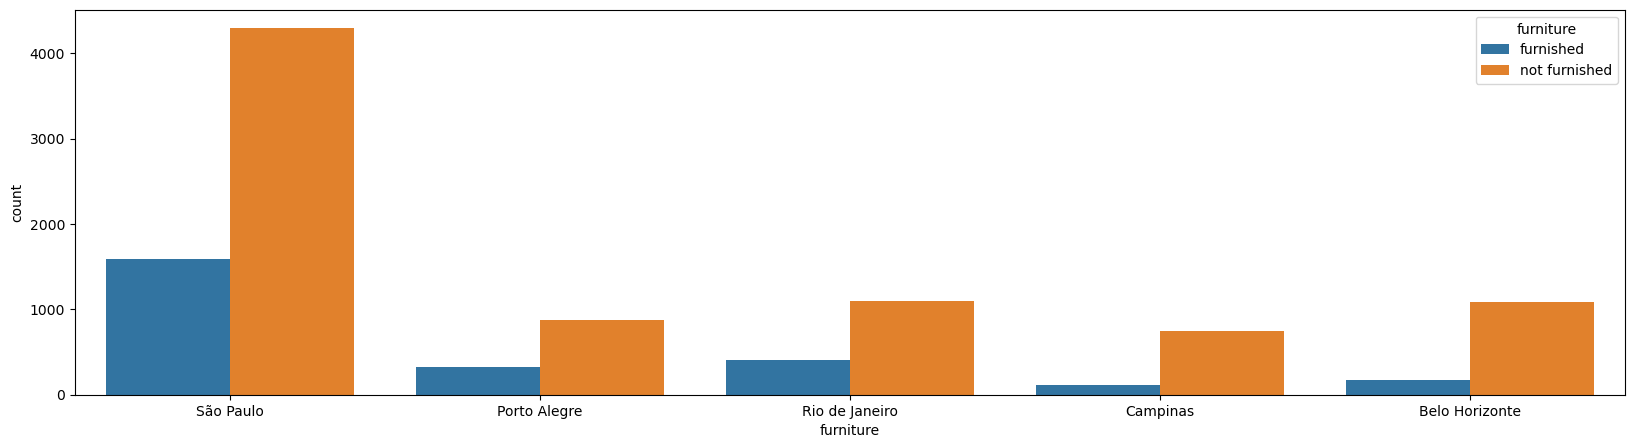

In [29]:
bivar('furniture')

### The most of the Houses are not Furnished in the cities.

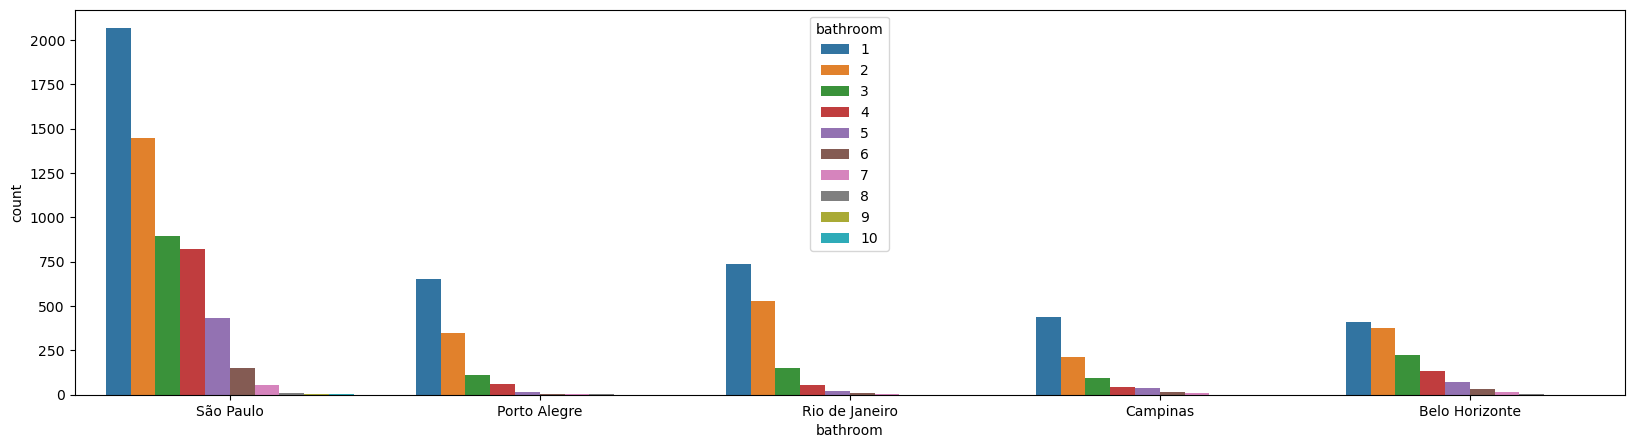

In [30]:
bivar('bathroom')

### The most no.of Houses are built with 1 bathroom.

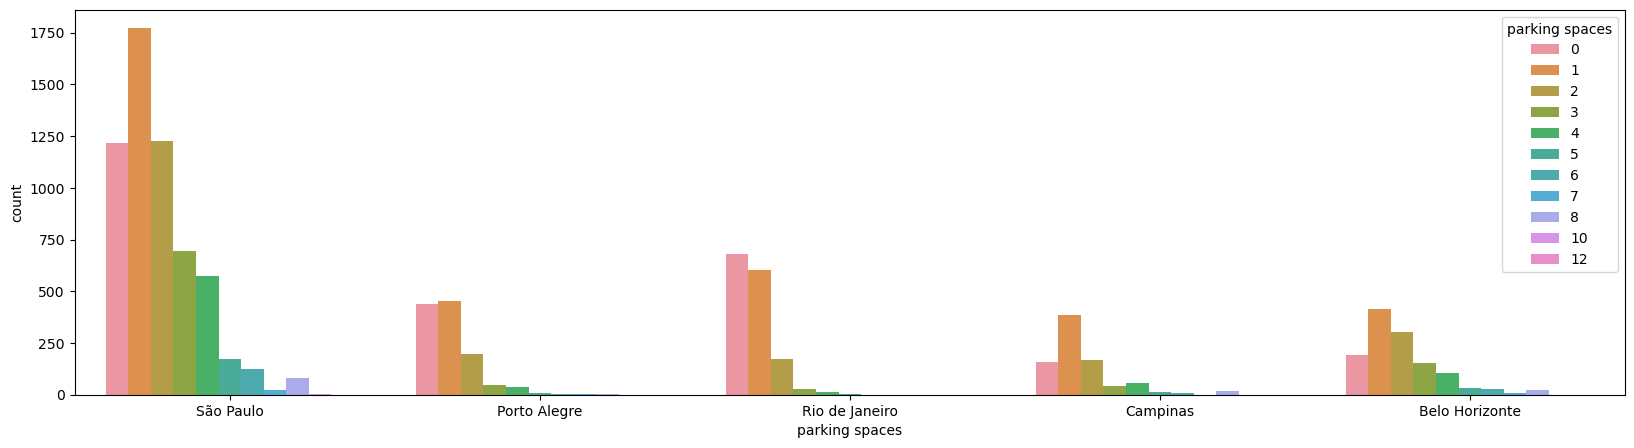

In [31]:
bivar('parking spaces')

### Rio De Janerio has more no.of parking spaces.

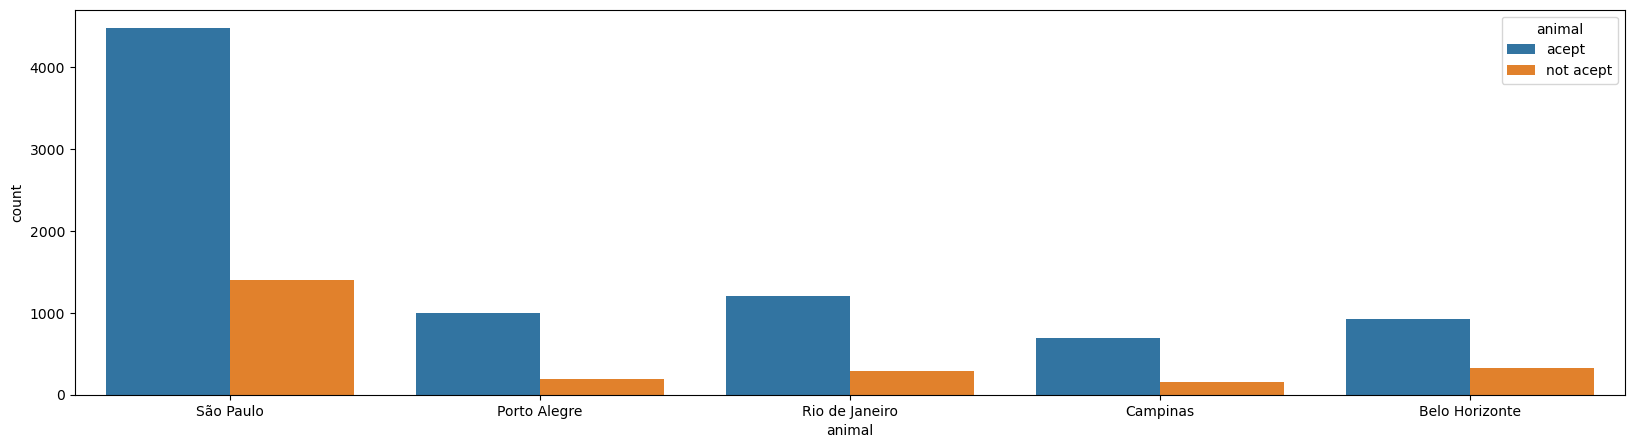

In [32]:
bivar('animal')

### In every City the Pets are Acccepted.

In [33]:
con

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [34]:
def num_bivar(col,col1='city'):
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    sns.histplot(x=col,hue='city',data=bh_df,ax=ax[0])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=col,x='city',data=bh_df,ax=ax[1])

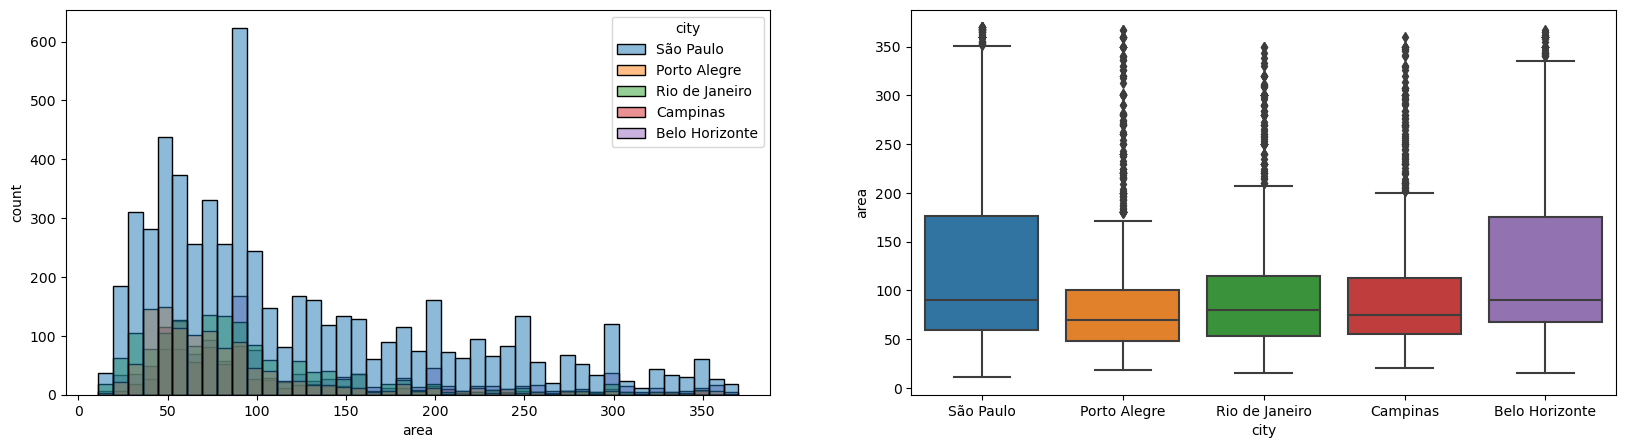

In [35]:
num_bivar('area')

### The Cities Sao Paulo and Belo horizonte has the highest range  of plot area's and 50% of the plot in every city are below 100

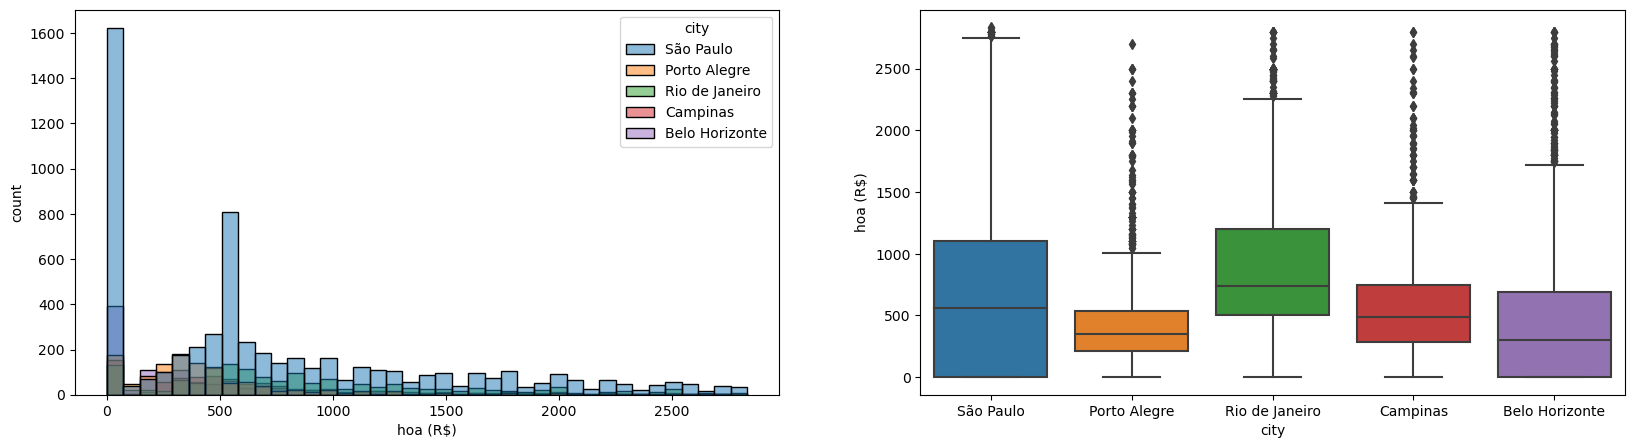

In [36]:
num_bivar('hoa (R$)')

### Hoa amount is below 500 R$

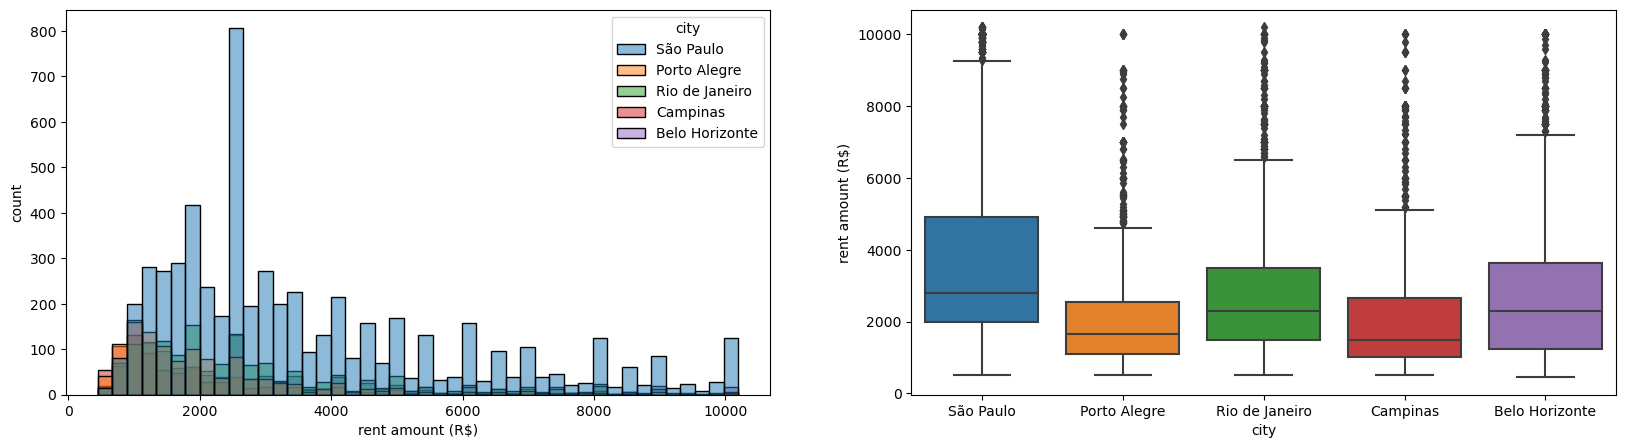

In [37]:
num_bivar('rent amount (R$)')

### Rent amount is lowest for Porto Alegre and Campinas

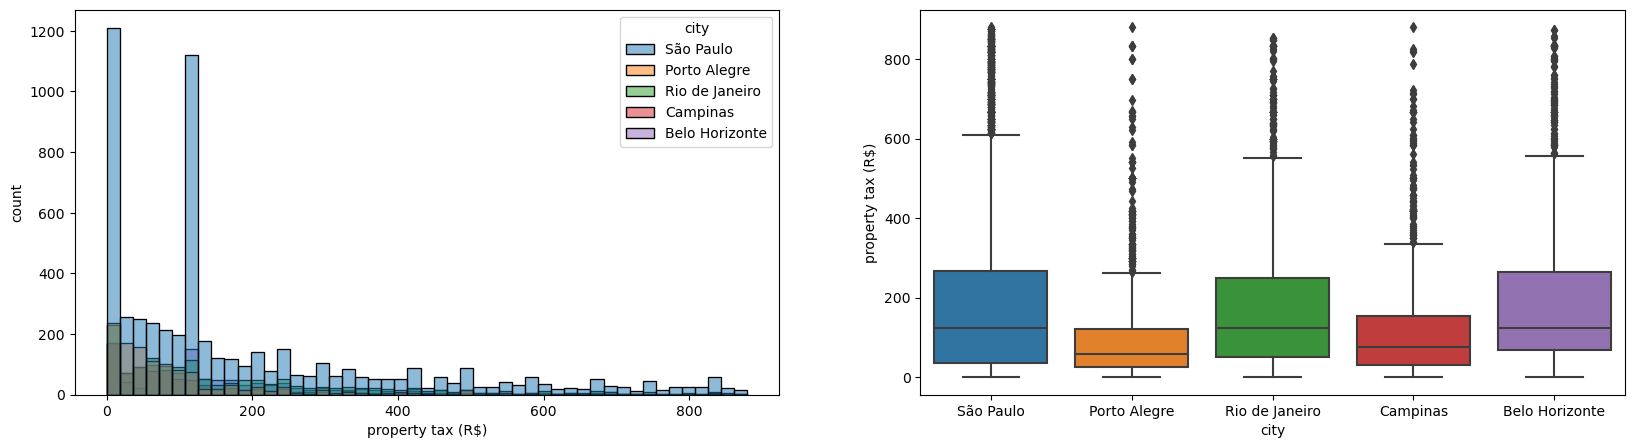

In [38]:
num_bivar('property tax (R$)')

### Property tax is lowest for Porto Alegre and Campinas

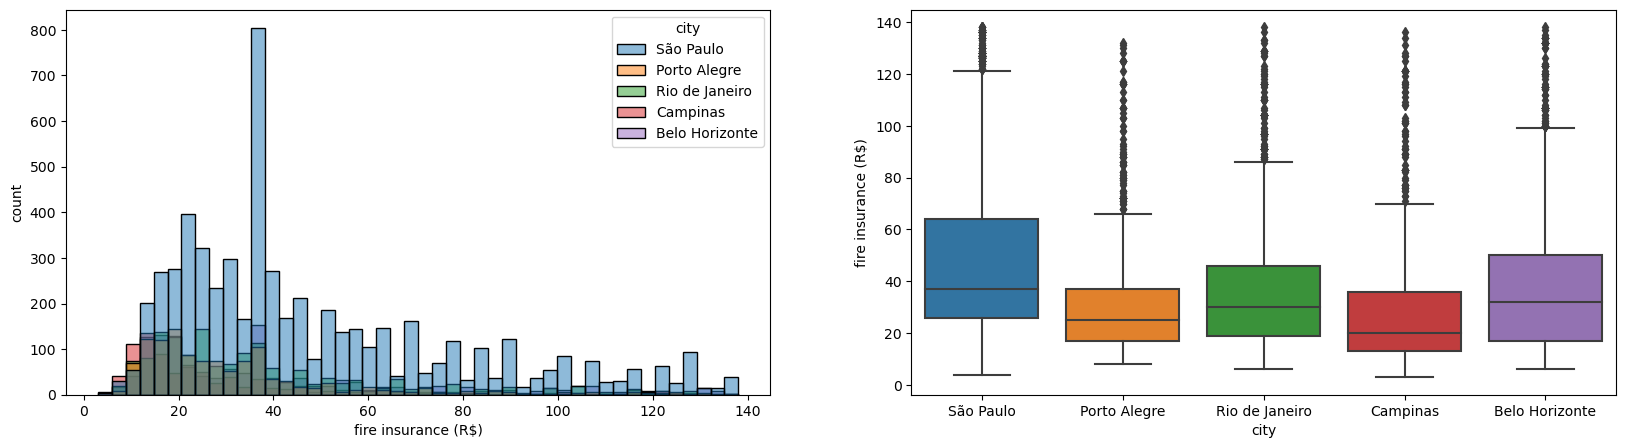

In [39]:
num_bivar('fire insurance (R$)')

### Fire Insurance is lowest for Campinas.

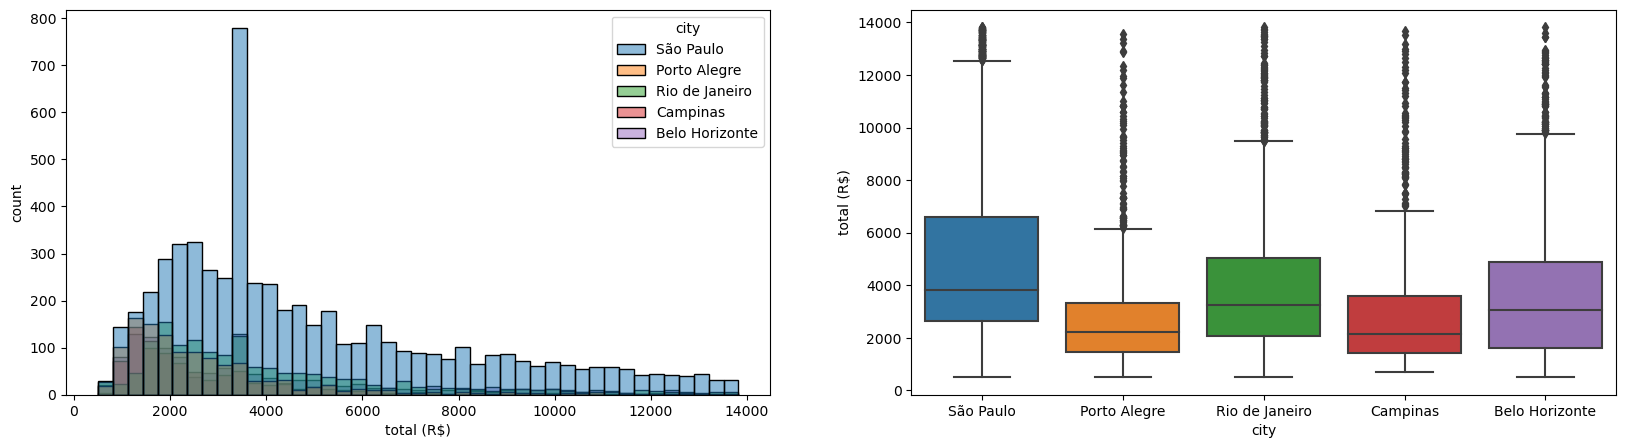

In [40]:
num_bivar('total (R$)')

### The Total cost is lowest for Campinas and Porto Alegre

## MultiVariant Analysis

#### for bachelors:

In [41]:
bh_df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618.0
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,125,63,7973.0


In [42]:
cat

['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']

#### For bachelor's the category consider here is total_living_space, furniture, bathrooms, rooms, parking_space, animal

In [43]:
cond=(bh_df['area'] <=100) &(bh_df['furniture']=='not furnished')&(bh_df['rooms']==1) & (bh_df['bathroom'] ==1) & (bh_df['parking spaces']== 0) & (bh_df.animal=='not acept')
b=bh_df[cond]
b

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836.0
74,Rio de Janeiro,60,1,1,0,10,not acept,not furnished,450,1800,48,24,2322.0
78,São Paulo,45,1,1,0,1,not acept,not furnished,300,1240,0,16,1556.0
132,São Paulo,34,1,1,0,5,not acept,not furnished,347,1200,45,16,1608.0
163,São Paulo,22,1,1,0,0,not acept,not furnished,0,976,0,15,991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,São Paulo,60,1,1,0,0,not acept,not furnished,0,980,0,15,995.0
10492,São Paulo,30,1,1,0,2,not acept,not furnished,507,2000,0,26,2533.0
10579,São Paulo,30,1,1,0,0,not acept,not furnished,0,1000,0,16,1016.0
10640,São Paulo,27,1,1,0,5,not acept,not furnished,1405,3500,1,45,4951.0


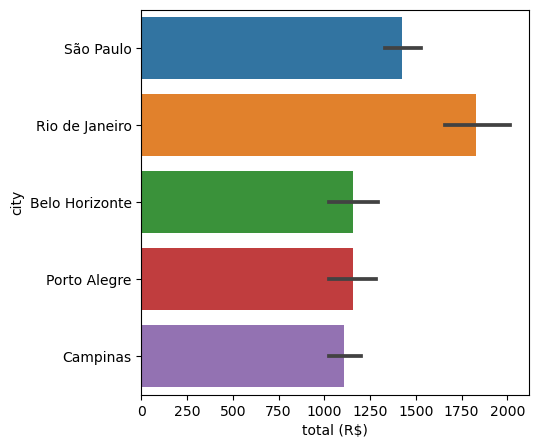

In [44]:

plt.figure(figsize=(5,5))
sns.barplot(y='city',x='total (R$)',data=b)
plt.show()

### Campinas is best for living as total_cost is around 1100 R followed closely by Belo Horizonte & Porto Alegre of around 1250 R$

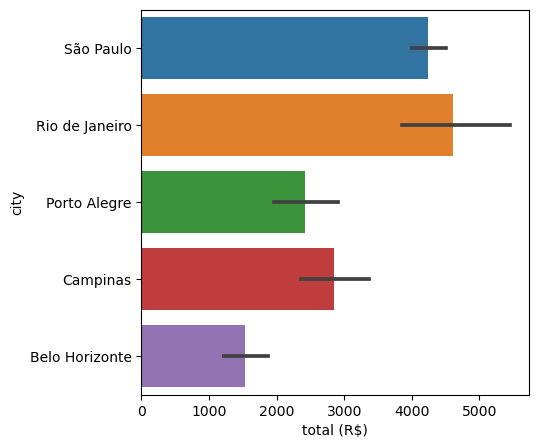

In [45]:
cond=(bh_df['area'] <=100) &(bh_df['furniture']=='furnished')&(bh_df['rooms']==1) & (bh_df['bathroom'] ==1) & (bh_df['parking spaces']== 1) & (bh_df.animal=='acept')
b1=bh_df[cond]
plt.figure(figsize=(5,5))
sns.barplot(y='city',x='total (R$)',data=b1)
plt.show()

### Belo Horizonte can be considered when furniture and pet is involved.

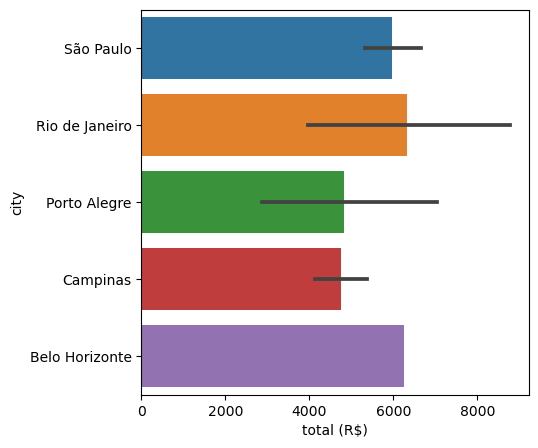

In [46]:
cond=(bh_df['area'] <=130) &(bh_df['furniture']=='furnished')&(bh_df['rooms']==2) & (bh_df['bathroom'] ==2) & (bh_df['parking spaces']== 2) & (bh_df.animal=='acept')
b2=bh_df[cond]
plt.figure(figsize=(5,5))
sns.barplot(y='city',x='total (R$)',data=b2)
plt.show()

### Campinas can be considered if group of friends decided to stay

##### The best cities for Bachelor's which offer low cost of living for relocating are Campinas, followed by Belo Horizonte.

#### For Mid_Size Family:

##### For MidSize_Family the category consider here is total_living_space, furniture, floor, bathrooms, rooms, parking_space, animal

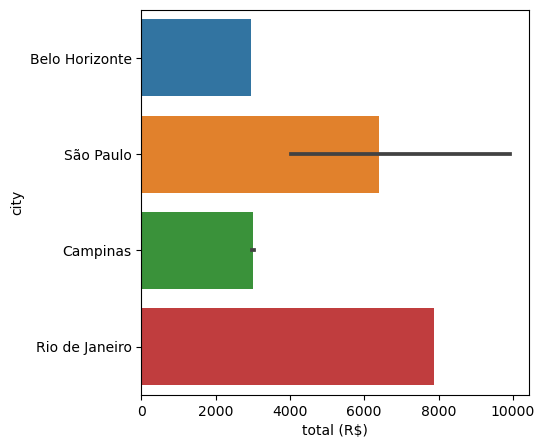

In [47]:
cond=(bh_df['area'] <=200) &(bh_df['furniture']=='furnished')&(bh_df['rooms']==3) & (bh_df['bathroom'] ==2) & (bh_df['parking spaces']== 2) &(bh_df['floor']== 1) & (bh_df.animal=='acept')
m=bh_df[cond]
plt.figure(figsize=(5,5))
sns.barplot(y='city',x='total (R$)',data=m)
plt.show()

#### Campinas, Belo Horizonte can be considered for mid size with Furniture and Pet involved.

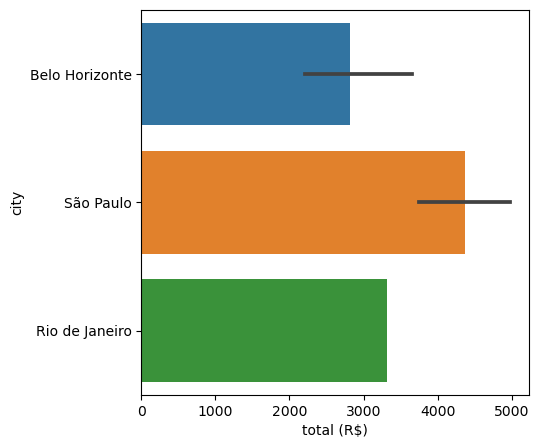

In [48]:
cond=(bh_df['area'] <=250) &(bh_df['furniture']=='not furnished')&(bh_df['rooms']>=2) & (bh_df['bathroom'] ==3) & (bh_df['parking spaces']== 2) &(bh_df['floor']== 2) & (bh_df.animal=='not acept')
m1=bh_df[cond]
plt.figure(figsize=(5,5))
sns.barplot(y='city',x='total (R$)',data=m1)
plt.show()

#### Belo Horizonte followed by Rio de Janerio can be considered when no furniture with area <= 250, no Animal acceptance.

##### The best cities for MidSize_Family which offer low cost of living for relocating are Belo Horizonte.

### for Large_Family:

### For Large_Family the category consider here is total_living_space, furniture, floor, bathrooms, rooms, parking_space, animal

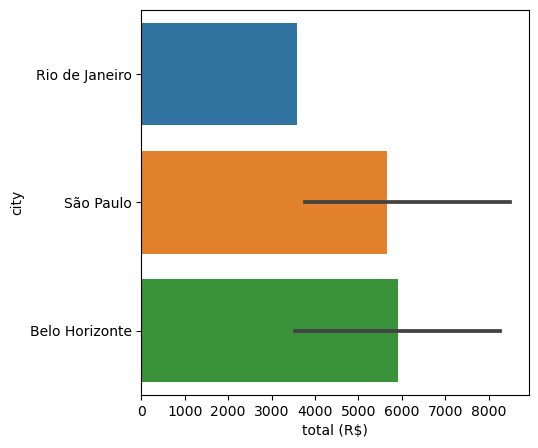

In [49]:
cond=(bh_df['area'] <=300) &(bh_df['furniture']=='furnished')&(bh_df['rooms']==3) & (bh_df['bathroom'] ==3) & (bh_df['parking spaces']== 2) &(bh_df['floor']== 2) & (bh_df.animal=='acept')
l=bh_df[cond]
plt.figure(figsize=(5,5))
sns.barplot(y='city',x='total (R$)',data=l)
plt.show()

#### Area <=300, with furnished and Animal acceptance we can consider Rio De Janerio followed by  Sao Paulo for Large Families.

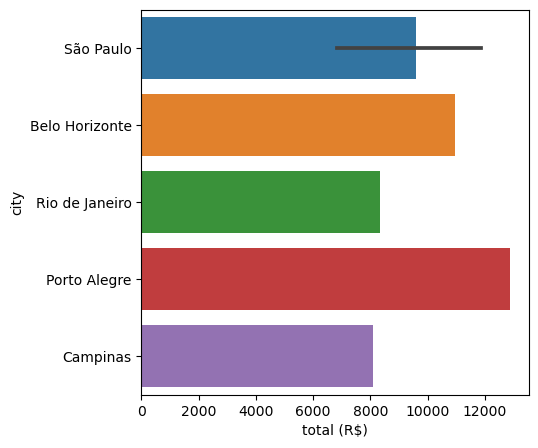

In [50]:
cond=(bh_df['area'] <=350) &(bh_df['furniture']=='furnished')&(bh_df['rooms']>=3) & (bh_df['bathroom'] >=3) & (bh_df['parking spaces']== 3) &(bh_df['floor']== 3) & (bh_df.animal=='acept')
l=bh_df[cond]
plt.figure(figsize=(5,5))
sns.barplot(y='city',x='total (R$)',data=l)
plt.show()

#### Camipnas, Rio De Janerio followed by Sao Paulo can be considered for more living area, rooms & bathrooms more than 3 with animal and furniture.

Rio De Janerio can be consider as  the best city  for Large Family relocation.